# Prepare test data for OSS model evaluations

## Imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.style.use("ggplot")

params = {
    "text.color": (0.25, 0.25, 0.25),
    "figure.figsize": [16, 9],
}

plt.rcParams.update(params)

import seaborn as sns

import pandas as pd

pd.options.mode.chained_assignment = None
pd.options.display.max_rows = 500
pd.options.display.max_seq_items = 500

# Install the ZIX package from here:
# https://github.com/machinelearningZH/zix_understandability-index
# pip install git+https://github.com/machinelearningZH/zix_understandability-index
from zix.understandability import get_cefr, get_zix

/Users/teamdata/miniconda3/envs/std/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/teamdata/miniconda3/envs/std/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Prepare data

In [2]:
# Load data, get stats.
df = pd.read_excel("_data/testdata_50_raw.xlsx")
df.columns = ["source_text"]
df.source_text = df.source_text.apply(lambda x: x.strip())
df["word_count"] = df["source_text"].apply(lambda x: len(x.split()))
df["zix"] = df["source_text"].apply(get_zix)
df["cefr"] = df["zix"].apply(get_cefr)
df.to_parquet("_data/testdata_50_final.parq")

In [3]:
print(df.word_count.describe())
print()
print(df.zix.describe())
print()
print(df.cefr.value_counts())
print()

count     50.000000
mean     119.260000
std       59.132439
min       27.000000
25%       71.250000
50%      110.500000
75%      148.250000
max      259.000000
Name: word_count, dtype: float64

count    50.000000
mean     -4.645146
std       2.520392
min     -10.000000
25%      -6.301930
50%      -4.042277
75%      -2.911648
max      -0.200167
Name: zix, dtype: float64

cefr
C2    25
C1    18
B2     7
Name: count, dtype: int64



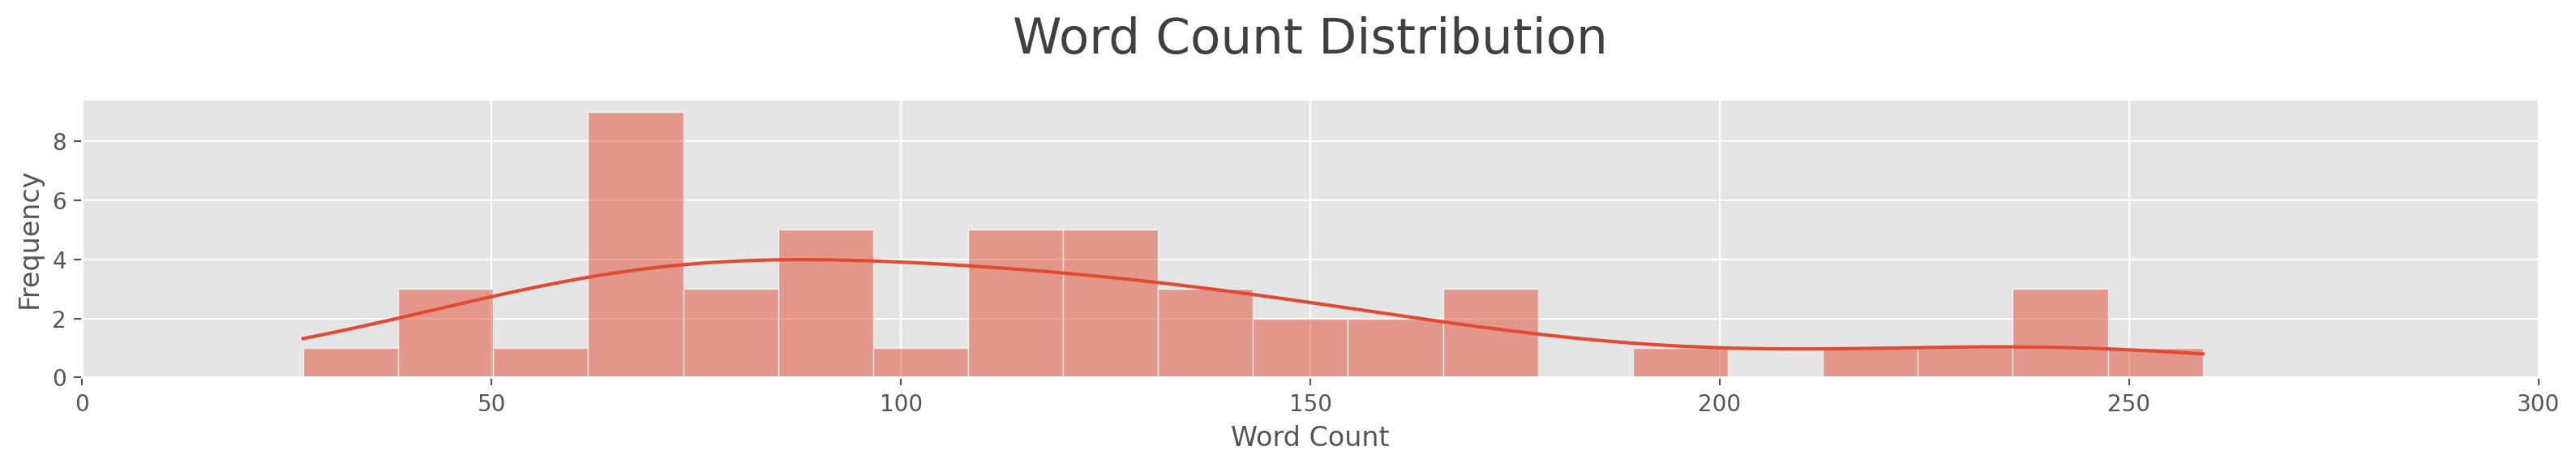

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
sns.histplot(df.word_count, bins=20, ax=ax, kde=True)
ax.set_title("Word Count Distribution", fontsize=22, pad=20)
ax.set_xlabel("Word Count")
ax.set_ylabel("Frequency")
ax.set_xlim(0, 300)
plt.tight_layout()
plt.show()


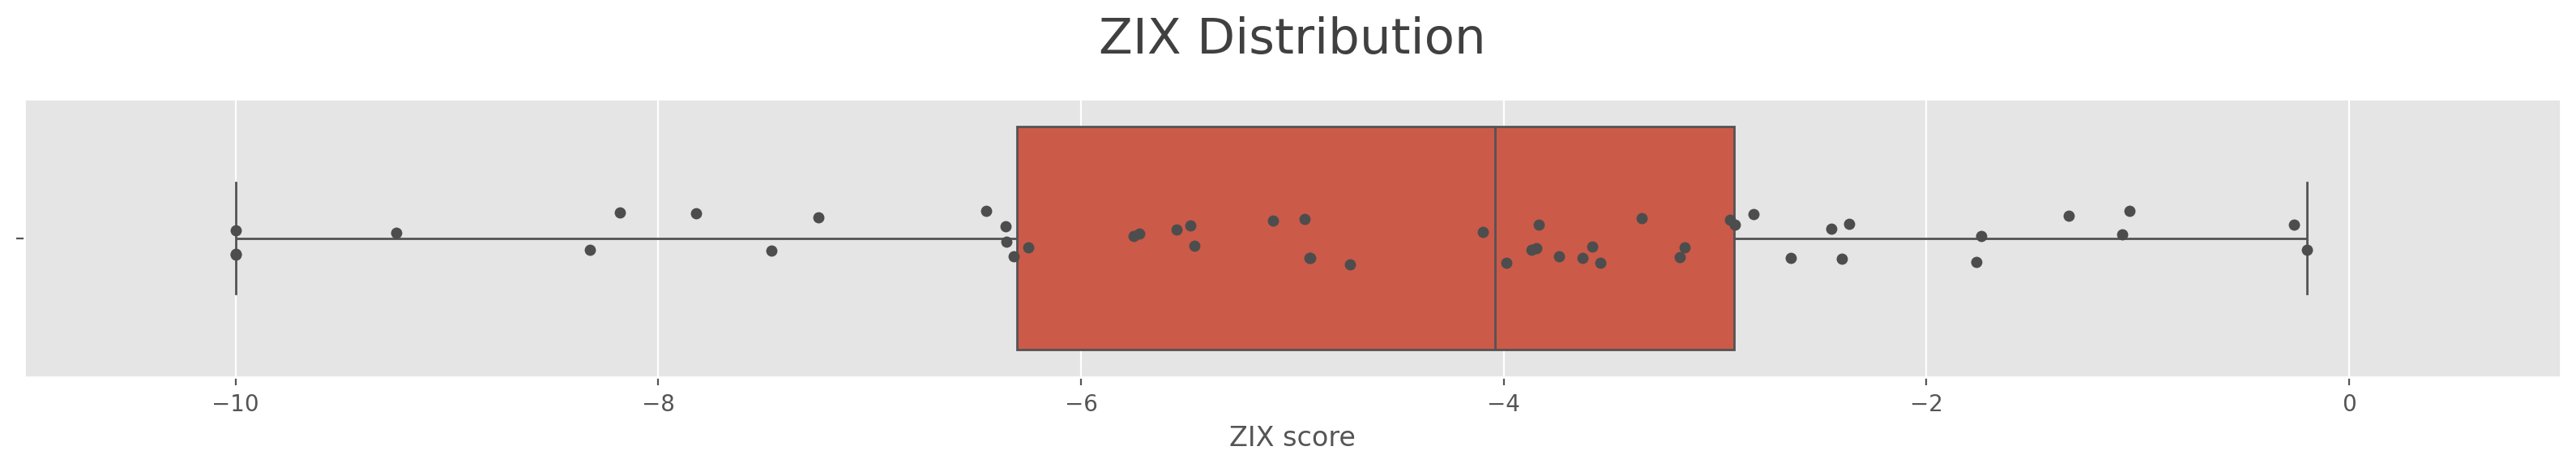

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
sns.boxplot(df, x="zix", ax=ax)
sns.stripplot(df, x="zix", ax=ax, color=".3")
ax.set_title("ZIX Distribution", fontsize=22, pad=20)
ax.set_xlabel("ZIX score")
ax.set_xlim(-11, 1)
plt.tight_layout()
plt.show()